# Question 1

**The MNIST handwritten digit dataset is one of the most commonly used datasets for image classification. You can access the 
dataset here: http://yann.lecun.com/exdb/mnist/. It is also available in many ML packages such as TensorFlow, PyTorch, FastAI. 
Feel free to directly load the dataset via either source. After obtaining the data, design a neural network architecture to perform 
digit recognition and share your code implementing the NN and appropriate performance metrics on the test set.**

# Background

For the given problem, aim is to correctly identify digits from a dataset of tens of thousands of handwritten images.

# Proposed Solution

This is an image classification problem. Following NN can be used to classify the handwritten digits.
1. Simple Neural Network with hidden layers
2. Convolutional Neural Network etc.

<h3> In this notebook, a simple neural network architecture with input layer, 4 hidden layer and output layer has been demonstrated.<h3>

# Importing Libraries and Reading Data

**Importing Libraries**

In [138]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score 
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import os
import datetime

**Loading the dataset using Keras API**

In [169]:
# loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**Total Number of samples**

In [170]:
print("Number of training sample is",x_train.shape[0])
print("Number of test sample is",x_test.shape[0])

Number of training sample is 60000
Number of test sample is 10000


**Shape of the train, validation and test sample**

In [171]:
print("Shape of training samples is",x_train.shape)
print("Shape of test samples is",x_test.shape)

Shape of training samples is (60000, 28, 28)
Shape of test samples is (10000, 28, 28)


**Shape of the train, validation and test sample - labels**

In [172]:
print("Shape of labels for training samples is",y_train.shape)
print("Shape of labels for test samples is",y_test.shape)

Shape of labels for training samples is (60000,)
Shape of labels for test samples is (10000,)


**First Training Example**

In [7]:
print("first training example shape", x_train[0].shape)
print(x_train[0])
print("\n\n")
print("first label for first training example shape", y_train[0].shape)
print(y_train[0])

first training example shape (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  17  47  47  47  47  47  47  28   0]
 [  0   0   0   0   0   0   0   0   0  14  63   0   0   0  62 138 197 197
  197 217 253 253 253 253 253 253 230   0]
 [  0   0   0   0   0   0   0   0   0 151 170   0  56 232 250 253 231 217
  217 217 217 217 217 217 128 179 132   0]
 [  0   0   0   0   0   0 

**Visualizing first training example**

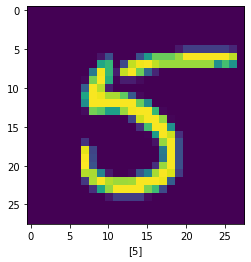

In [8]:
# first image from the training set
plt.imshow(x_train[0])
plt.xlabel([y_train[0]])
plt.show()

**Distribution of Target Variable**

In [9]:
# unique labels from training set and count
unique_labels, labels_counts = np.unique(y_train, return_counts=True)
label_stats = dict(zip(unique_labels, labels_counts))
print(label_stats)

{0: 4748, 1: 5420, 2: 4784, 3: 4912, 4: 4666, 5: 4317, 6: 4741, 7: 4966, 8: 4691, 9: 4755}


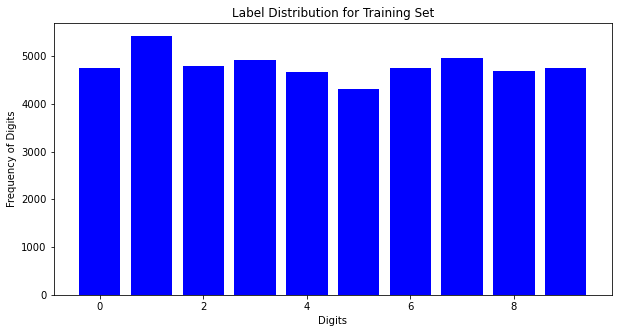

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(unique_labels, labels_counts, color ='blue')
 
plt.xlabel("Digits")
plt.ylabel("Frequency of Digits")
plt.title("Label Distribution for Training Set")
plt.show()

**Observations**
1. Dataset is balanced as we can seen the distribution of target variable.

# Feature Normalization

In [140]:
img_rows, img_cols = 28, 28

# reshaping
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# scaling
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [141]:
# convert target variable to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
#y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [142]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model Fitting

**Model Architecture**

In [153]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Model Summary**

In [156]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 26, 26, 25)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 16900)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               1690100   
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 1,691,360
Trainable params: 1,691,360
Non-trainable params: 0
_________________________________________________________________


In [157]:
#tf.keras.utils.plot_model(model, to_file="image_classification_nn_architecture", show_shapes=True)

**Defining Checkpoint, tensorboard and Early Stopping**

In [158]:
checkpoint = ModelCheckpoint("./model_checkpoint/img_classification_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir,histogram_freq=0, write_graph=True,write_grads=True)

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience=2)

callbacks_list = [es, checkpoint, tensorboard_callback]

**Defining Optimizer, loss and metrics**

In [159]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [160]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, shuffle = True, callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.1895 - accuracy: 0.9445
Epoch 00001: val_accuracy improved from -inf to 0.97830, saving model to ./model_checkpoint/img_classification_model.hdf5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1891 - accuracy: 0.9447 - val_loss: 0.0723 - val_accuracy: 0.9783
Epoch 2/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9832
Epoch 00002: val_accuracy improved from 0.97830 to 0.97960, saving model to ./model_checkpoint/img_classification_model.hdf5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0588 - val_accuracy: 0.9796
Epoch 3/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9905
Epoch 00003: val_accuracy improved from 0.97960 to 0.98410, saving model to ./model_checkpoint/img_classification_model.hdf5


In [173]:
#%load_ext tensorboard
#%reload_ext tensorboard
#logs_base_dir = "./logs"
#os.makedirs(logs_base_dir, exist_ok=True)
#%tensorboard --logdir {logs_base_dir}"""

**Plot of Model Accuracy and Model Loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
ERROR! Session/line number was not unique in database. History logging moved to new session 326


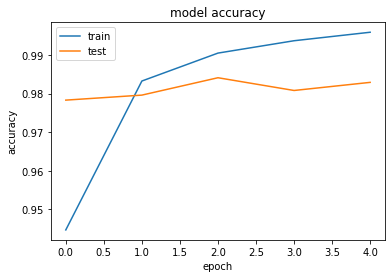

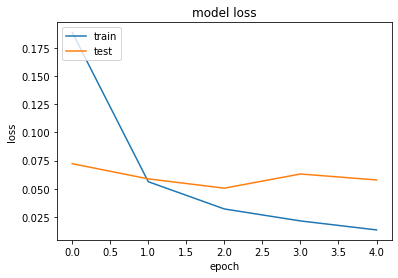

In [163]:
import matplotlib.pyplot as plt

history= model.history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [164]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.057799300031943134
Test accuracy: 0.9829


In [167]:
predictions = model.predict_classes([x_test])

In [168]:
print(predictions[0])

7


**Conclusion**

The CNN model can be further fine tuned to bring test accuracy close to 99% without overfitting the model.